## Day 2: Whats with this character?

Lineshare bar charts, Co-occurrence heat maps, Word clouds

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/the_office_lines.csv",encoding='utf8')
df.head(10)

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
5,6,1,1,2,"[on the phone] Yes, I'd like to speak to your ...",Michael,False
6,7,1,1,3,"I've, uh, I've been at Dunder Mifflin for 12 y...",Michael,False
7,8,1,1,3,Well. I don't know.,Pam,False
8,9,1,1,3,"If you think she's cute now, you should have s...",Michael,False
9,10,1,1,3,What?,Pam,False


>Q: Do you still remember the cleaning steps we made?

In [3]:
# cleaning step 1
# remove deleted scenes
df = df[df['deleted']==False]

In [4]:
# cleaning step 2
major_characters = df['speaker'].value_counts()[:50].index
major_characters = [character for character in major_characters if character not in ['All','Everyone','#ALL#']]
df = df[df['speaker'].isin(major_characters)]
len(df)

54018

### Visualization 1: Lineshare Bar Plots


A character's **lineshare** is defined as the number of lines s/he spoke divided by the number of lines spoken by all characters.

*Assumption 1*: The more lines a character has, the more important s/he is to the story.

#### 1.1. Lineshare for the whole series

In [5]:
#total number of lines for the whole series
total_lines = len(df)
total_lines

54018

In [6]:
#get number of lines per character
ls_df = df.groupby(['speaker'])[['line_text']].count().reset_index()
ls_df = ls_df.rename(columns={'line_text': 'num_lines'})
ls_df.head()

,speaker,num_lines
0,Andy,3968
1,Angela,1658
2,Brian,53
3,Carol,87
4,Cathy,50


In [7]:
ls_df['lineshare'] = ls_df['num_lines']/total_lines
ls_df = ls_df.sort_values("lineshare", ascending=False)
ls_df.head()

,speaker,num_lines,lineshare
32,Michael,11574,0.214262
15,Dwight,7167,0.132678
23,Jim,6609,0.122348
37,Pam,5205,0.096357
0,Andy,3968,0.073457


Text(0.5, 1.0, 'The Office Characters Lineshare')

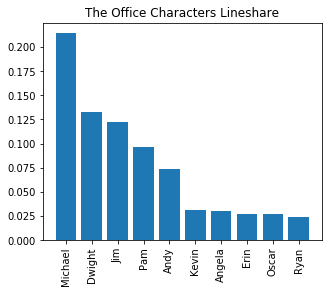

In [8]:
#Plot lineshare
# plot only top 10 characters
fig = plt.figure(figsize=(5,4))

data = ls_df.head(10)
plt.bar(data['speaker'],data['lineshare'])

plt.xticks(rotation=90)
plt.title("The Office Characters Lineshare")

#### 1.2. Lineshare per season

In [9]:
season_ls_df = df.groupby(['season','speaker'])['line_text'].count().reset_index()
season_ls_df = season_ls_df.sort_values(['season','line_text'],ascending=[True,False])
season_ls_df = season_ls_df.rename(columns={'line_text': 'num_lines'})
season_ls_df

,season,speaker,num_lines
10,1,Michael,509
4,1,Jim,231
2,1,Dwight,222
12,1,Pam,170
5,1,Katy,59
...,...,...,...
229,9,Nate,6
220,9,Hank,4
221,9,Helene,2
228,9,Michael,2


In [10]:
#retain top 5 speakers per season
season_ls_df = season_ls_df.groupby('season').head(5)
season_ls_df = season_ls_df.set_index(['season','speaker'])
season_ls_df

num_lines
season speaker           
1      Michael        509
       Jim            231
       Dwight         222
       Pam            170
       Katy            59
2      Michael       1894
       Dwight         856
       Jim            764
       Pam            625
       Jan            234
3      Michael       1989
       Dwight         939
       Jim            773
       Pam            648
       Andy           391
4      Michael       1633
       Jim            684
       Dwight         547
       Pam            528
       Ryan           228
5      Michael       2163
       Dwight        1074
       Jim            875
       Pam            706
       Andy           497
6      Michael       1983
       Jim            928
       Dwight         811
       Pam            706
       Andy           538
7      Michael       1401
       Dwight         703
       Jim            687
       Pam            612
       Andy           557
8      Andy          1125
       Dwight         946
       Jim            869
       Pam            475
       Erin           427
9      Dwight        1069
       Jim            798
       Pam            735
       Andy           637
       Angela         381

In [11]:
#get total lines
season_total_lines_df = df.groupby(['season'])[['line_text']].count()
season_total_lines_df  = season_total_lines_df.rename(columns={'line_text': 'num_lines'})
season_total_lines_df

,num_lines
season,
1,1471
2,5649
3,7040
4,5230
5,7735
6,7052
7,6849
8,6610
9,6382


In [12]:
season_ls_df['lineshare'] = season_ls_df['num_lines']/season_total_lines_df['num_lines']
season_ls_df = season_ls_df.reset_index()
season_ls_df

,season,speaker,num_lines,lineshare
0,1,Michael,509,0.346023
1,1,Jim,231,0.157036
2,1,Dwight,222,0.150918
3,1,Pam,170,0.115568
4,1,Katy,59,0.040109
5,2,Michael,1894,0.335281
6,2,Dwight,856,0.151531
7,2,Jim,764,0.135245
8,2,Pam,625,0.110639
9,2,Jan,234,0.041423


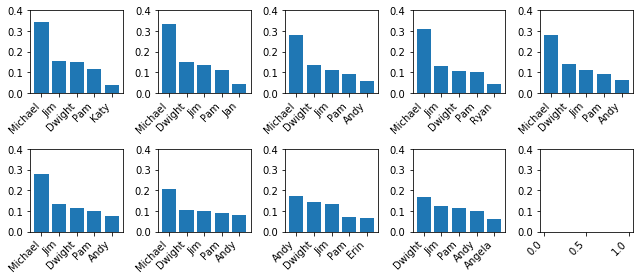

In [13]:
#plot lineshare per season
#3x3 layout
fig,axes = plt.subplots(2,5, figsize=(9,4))
#flatten axes to loop over axes properly
axes = [ax for sublist in axes for ax in sublist]

for n in np.arange(1,11):
    plt.sca(axes[n-1])
    data = season_ls_df[season_ls_df['season']==n]
    plt.bar(data['speaker'],data['lineshare'])
    plt.xticks(rotation=45, ha='right')
    plt.ylim([0,0.4])
    
fig.tight_layout()

*Insight*: Lineshare reveals not only how a character dominated the series, but also how the other characters participated in the story

### Visualization 2: Co-occurence heatmap


Next we quantify if the presence of one character in a scene implies the presence of another character.

This is called **co-occurence** and is defined as the number of times two characters are in a single scene together.

*Assumption 2*: The more often we see two characters together, the more important they are to the story.

In [14]:
cdf = pd.read_csv("data/the_office_speaker_combinations.csv")
cdf.head()

,season,episode,scene,speaker1,speaker2
0,1,1,1,Jim,Michael
1,1,1,3,Michael,Pam
2,1,1,7,Jim,Michael
3,1,1,7,Dwight,Michael
4,1,1,7,Jim,Dwight


### Make co-occurence heatmap

In [15]:
co_df = cdf.groupby(['speaker1','speaker2']).size()
co_df = co_df.reset_index()
co_df = co_df.rename(columns={0: 'num_scenes'})
co_df.sort_values('num_scenes',ascending=False)

,speaker1,speaker2,num_scenes
258,Jim,Pam,800
151,Dwight,Michael,717
242,Jim,Dwight,680
416,Michael,Pam,533
255,Jim,Michael,501
...,...,...,...
199,Helene,Creed,1
198,Hank,Toby,1
195,Hank,Meredith,1
194,Hank,Holly,1


A matrix with the top 50 speaking characters is large, so we need to narrow it down even further.

In [16]:
#pick top 10 characters with most lines
top_characters = df['speaker'].value_counts()[:10].index.tolist()
top_characters

['Michael',
 'Dwight',
 'Jim',
 'Pam',
 'Andy',
 'Kevin',
 'Angela',
 'Erin',
 'Oscar',
 'Ryan']

A **co-occurence matrix** describes how often any 2 characters are present in a scene. Thus, we consider all possible pairs of characters and we need to know how often each pair appeared in the dataset.

In [17]:
# initialize matrix
# N x N where N is number of characters considered
data = np.zeros((len(top_characters),len(top_characters)))

# populate the matrix
# nested for loop to go over each characcter combination
for j,n in enumerate(top_characters):
    for i,m in enumerate(top_characters):
        print((m,n))
        try:
            #BUG FIX: match array location by considering both possible orders of speaker pairs 
            val = co_df[(co_df['speaker1']==m)&(co_df['speaker2']==n)|
                       (co_df['speaker1']==n)&(co_df['speaker2']==m)]['num_scenes'].values[0]
            data[j][i] = val
            
        except:
            print("No pair data for characters %s and %s" % (m,n))
            data[j][i] = 0
# is it okay to trigger exception for differently ordered pairs?
data

('Michael', 'Michael')
No pair data for characters Michael and Michael
('Dwight', 'Michael')
('Jim', 'Michael')
('Pam', 'Michael')
('Andy', 'Michael')
('Kevin', 'Michael')
('Angela', 'Michael')
('Erin', 'Michael')
('Oscar', 'Michael')
('Ryan', 'Michael')
('Michael', 'Dwight')
('Dwight', 'Dwight')
No pair data for characters Dwight and Dwight
('Jim', 'Dwight')
('Pam', 'Dwight')
('Andy', 'Dwight')
('Kevin', 'Dwight')
('Angela', 'Dwight')
('Erin', 'Dwight')
('Oscar', 'Dwight')
('Ryan', 'Dwight')
('Michael', 'Jim')
('Dwight', 'Jim')
('Jim', 'Jim')
No pair data for characters Jim and Jim
('Pam', 'Jim')
('Andy', 'Jim')
('Kevin', 'Jim')
('Angela', 'Jim')
('Erin', 'Jim')
('Oscar', 'Jim')
('Ryan', 'Jim')
('Michael', 'Pam')
('Dwight', 'Pam')
('Jim', 'Pam')
('Pam', 'Pam')
No pair data for characters Pam and Pam
('Andy', 'Pam')
('Kevin', 'Pam')
('Angela', 'Pam')
('Erin', 'Pam')
('Oscar', 'Pam')
('Ryan', 'Pam')
('Michael', 'Andy')
('Dwight', 'Andy')
('Jim', 'Andy')
('Pam', 'Andy')
('Andy', 'Andy')


array([[  0., 717., 501., 533., 225., 245., 178., 116., 217., 217.],
       [717.,   0., 680., 382., 332., 198., 280., 147., 196., 143.],
       [501., 680.,   0., 800., 317., 233., 133., 113., 178., 130.],
       [533., 382., 800.,   0., 220., 223., 186., 117.,  93.,  68.],
       [225., 332., 317., 220.,   0., 203., 142.,  93., 167.,  74.],
       [245., 198., 233., 223., 203.,   0., 210., 105., 233.,  67.],
       [178., 280., 133., 186., 142., 210.,   0.,  61., 199.,  33.],
       [116., 147., 113., 117.,  93., 105.,  61.,   0.,  79.,  41.],
       [217., 196., 178.,  93., 167., 233., 199.,  79.,   0.,  28.],
       [217., 143., 130.,  68.,  74.,  67.,  33.,  41.,  28.,   0.]])

In [18]:
data

array([[  0., 717., 501., 533., 225., 245., 178., 116., 217., 217.],
       [717.,   0., 680., 382., 332., 198., 280., 147., 196., 143.],
       [501., 680.,   0., 800., 317., 233., 133., 113., 178., 130.],
       [533., 382., 800.,   0., 220., 223., 186., 117.,  93.,  68.],
       [225., 332., 317., 220.,   0., 203., 142.,  93., 167.,  74.],
       [245., 198., 233., 223., 203.,   0., 210., 105., 233.,  67.],
       [178., 280., 133., 186., 142., 210.,   0.,  61., 199.,  33.],
       [116., 147., 113., 117.,  93., 105.,  61.,   0.,  79.,  41.],
       [217., 196., 178.,  93., 167., 233., 199.,  79.,   0.,  28.],
       [217., 143., 130.,  68.,  74.,  67.,  33.,  41.,  28.,   0.]])

Text(0.5, 1, 'The Office: Character Co-occurence')

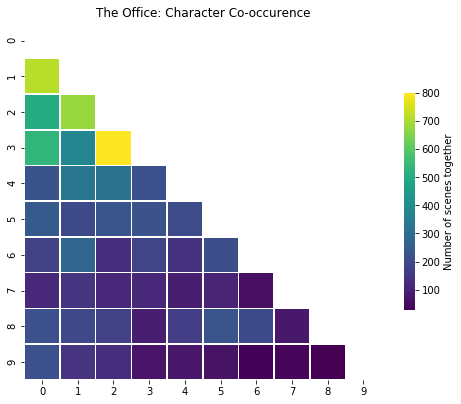

In [22]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data, dtype=bool))

#cmap = sns.color_palette("cubehelix", as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(data,mask=mask, cmap="viridis",
            square=True, linewidths=.5,
                 cbar_kws={"shrink": .5,'label': 'Number of scenes together'})

# ... and label them with the respective list entries
#ax.set_xticklabels(top_characters[:-1], rotation=90)
#ax.set_yticklabels([" "]+top_characters[1:], rotation=0)

# get xlim
# set appropriate xlim
#ax.set_xlim([0,9])
#ax.set_ylim([10,1])
ax.set_title("The Office: Character Co-occurence")

### Visualization 3. Word cloud

A word cloud is a visualization made of a cluster of words in different sizes. The bigger and bolder the word appears, the more often it's mentioned. 

We can use word clouds to infer a character's personality using his/her choice words

In [23]:
#Import the Natural Language Toolkit (nltk) module, most often used in NLP
# Already installed in anaconda
import nltk

#download stopwords
#only need to do this once
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/pollux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re 

**Stopwords** are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence

In [25]:
stop_words = stopwords.words('english')
#remove punctuation 
stop_words = {re.sub("[^a-zA-Z]+", "", word) for word in stop_words}
print(stop_words)

{'down', 'myself', 'has', 'i', 'at', 'a', 'from', 'for', 'those', 'yourself', 'havent', 'there', 'these', 'isnt', 'arent', 'had', 'so', 'were', 'to', 'hasn', 'them', 'here', 'itself', 'out', 'under', 'our', 'because', 'needn', 'such', 'against', 'wouldn', 'below', 'can', 'll', 'as', 'they', 'in', 'and', 'over', 'it', 'youll', 'theirs', 'dont', 'is', 'hadnt', 'about', 'above', 'that', 'very', 'herself', 'youve', 'who', 'am', 'its', 'wasn', 'haven', 'wouldnt', 'during', 'do', 'yours', 'all', 'didn', 'her', 'weren', 'youd', 'which', 'this', 'where', 'wasnt', 'you', 'neednt', 'your', 'on', 'now', 'being', 'again', 'couldnt', 'hadn', 'won', 'youre', 'their', 'why', 'other', 'been', 'while', 'doesnt', 'we', 'm', 'no', 'both', 's', 'my', 'themselves', 'not', 'between', 'mightnt', 't', 'was', 'shouldnt', 'mightn', 'o', 'up', 'shan', 'his', 'ourselves', 'than', 'each', 'into', 'will', 'having', 'hasnt', 'she', 'are', 'but', 'few', 'more', 'ain', 'have', 'werent', 're', 'should', 'yourselves', '

In [26]:
##########################
# Set character to make a word cloud out of
this_character = "Dwight"

In [27]:
character_lines = df[df['speaker']==this_character]['line_text'].values
character_lines

array(['[singing] Shall I play for you? Pa rum pump um pum [Imitates heavy drumming] I have no gifts for you. Pa rum pump um pum [Imitates heavy drumming]',
       'Whassup!', 'Whassup.', ...,
       'Don���t be an idiot. It���s for the severance. The best I can do one month for every year you���ve been here. That���s the max.',
       'Woah. Right. For what, the art? The music? The incredible nightlife? No thank you. But if you���re ever in the area, you���ll always have a place to stay���in my barn.',
       'Do I get along with my co-workers? Well, first of all, I don���t have co-workers anymore, I have subordinates. So��� have I gotten along with my subordinates? Let���s see. My supplier relations rep, Meredith Palmer, is the only person I know who knows how to properly head bang to Motorhead. Oscar Martinez, my accountant, is now godfather to my son. Angela Schrute, my former accountant is now my wife. My top salesman, Jim Halpert was best man at my wedding and office administrato

As you may see, there are still lots of punctuation and unknown symbols that will pollute the data for the word cloud. We clean this using the helper function below

In [29]:
def get_words(this_line):
    # strip newlines
    this_line = this_line.strip('\\n')
    #strip tab
    this_line = this_line.strip('\\t')
    #remove dots, commas, question marks, single and double quotes
    this_line = this_line.replace('.', '').replace('?', '').replace(
        ',', '').replace('\"', '').replace('\'', '')
    #remove text in brackets
    this_line = re.sub("[\(\[].*?[\)\]]", "", this_line)

    #tokenize and remove trailing spaces
    word_tokens = word_tokenize(this_line.lower().strip())

    #remove any other remaining symbols
    #re.sub("[^a-zA-Z]+\\w'", "", word)
    word_tokens = [''.join([c for c in word if (c.isalnum())]) for word in word_tokens
    ]
    #remove 0-length words
    word_tokens = [word for word in word_tokens if len(word) > 0]

    #remove stop words
    word_tokens = [w for w in word_tokens if not w in stop_words]
    return word_tokens

In NLP, a **corpus** is a set of words associated with a particular topic. In this case, it is labeled with the character who uttered the words

In [30]:
#character corpus
character_corpus = [get_words(line) for line in character_lines]
#flatten list
character_corpus = [word for line in character_corpus for word in line]
#get frequency of each word
character_word_frequency = pd.Series(character_corpus).value_counts()
character_word_frequency[:20]

im         458
oh         443
know       394
okay       320
get        316
like       315
jim        304
michael    289
one        278
go         278
thats      263
right      256
yeah       238
well       236
good       231
come       226
yes        226
hey        222
got        219
would      201
dtype: int64

In [34]:
!pip install wordcloud

In [35]:
#plot word cloud
#helper function

#not yet installed in Anaconda -install by running in your terminal "pip install wordcloud"
from wordcloud import WordCloud

def plot_wordcloud(wordlist):
    fig = plt.figure(figsize=(5,5))
    unique_string=(" ").join(wordlist)

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stop_words, 
                    min_font_size = 10).generate(unique_string)
    
    # plot the WordCloud image                        
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    return fig

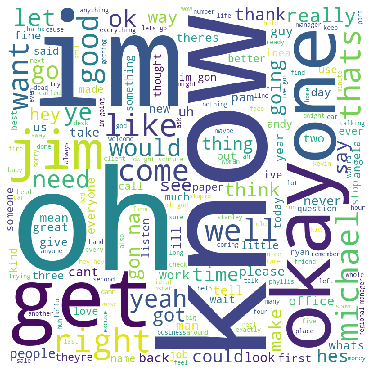

In [36]:
plot_wordcloud(character_corpus).savefig("figs/"+this_character+"_wordcloud.png")